In [1]:
import os
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive')
#print(os.listdir(GOOGLE_DRIVE_PATH))
import sys
from google.colab import drive
sys.path.append(GOOGLE_DRIVE_PATH)
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms

use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 64

import matplotlib.pyplot as plt

# hard-code random seeds for deterministic outcomes
np.random.seed(42)
torch.manual_seed(42)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):
        x = x.view((-1, 28*28))
        x = F.relu(self.fc(x))
        x = self.fc2(x)
        return x

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(5, 5))
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(5, 5))
        self.bn2 = nn.BatchNorm2d(32)
        self.conv2_drop = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(128, 100)
        self.fc2 = nn.Linear(100, 10)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=(3, 3))
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=(3, 3))
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=(3, 3))
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=(1, 1))
        self.bn6 = nn.BatchNorm2d(128)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.bn1(x)
        x = F.relu(self.conv2(x))
        x = self.conv2_drop(F.max_pool2d(self.bn2(x), 2))
        x = F.relu(self.conv3(x))
        x = self.bn3(x)
        x = F.relu(self.conv4(x))
        x = self.bn4(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2_drop(x)
        x = F.relu(self.conv5(x))
        x = self.bn5(x)
        x = F.relu(self.conv6(x))
        x = self.bn6(x)
        size = x.size()[1] * x.size()[2] * x.size()[3]
        # print(size)
        x = x.view(-1, size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34823503.55it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1138504.06it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9753660.35it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7500208.18it/s]
<ipython-input-4-db01032b5875>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/content/drive/

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1155: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1189: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1189: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, Source

Class		Orig	Adv
Class 0:	0.00	0.00
Class 1:	0.00	0.00
Class 2:	0.00	0.02
Class 3:	0.00	0.43
Class 4:	0.00	0.01
Class 5:	0.00	0.01
Class 6:	0.00	0.00
Class 7:	1.00	0.35
Class 8:	0.00	0.06
Class 9:	0.00	0.12


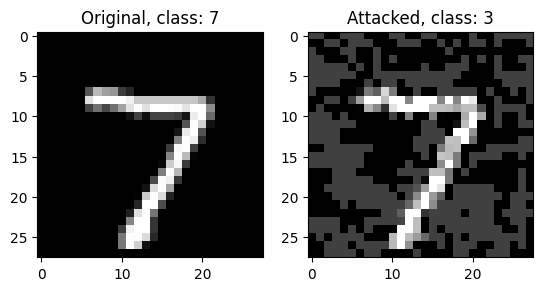

Class		Orig	Adv
Class 0:	0.00	0.00
Class 1:	0.00	0.00
Class 2:	0.00	0.78
Class 3:	0.00	0.01
Class 4:	0.00	0.00
Class 5:	0.00	0.00
Class 6:	0.00	0.00
Class 7:	1.00	0.18
Class 8:	0.00	0.01
Class 9:	0.00	0.01


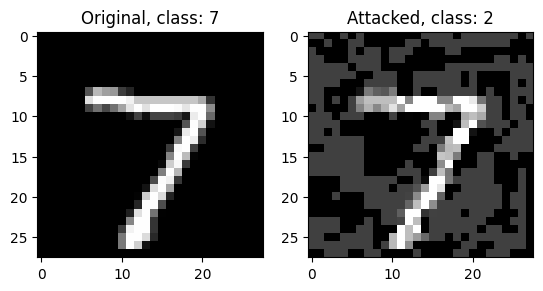

In [4]:


# loading the dataset
# note that this time we do not perfrom the normalization operation, see next
test_dataset = datasets.MNIST(
    'mnist_data/',
    train=False,
    download=True,
    transform=transforms.Compose(
        [transforms.ToTensor()]
    )
)


class Normalize(nn.Module):
    def forward(self, x):
        return (x - 0.1307)/0.3081


# we load the body of the neural net
model = torch.load('/content/drive/MyDrive/model.net', map_location='cpu')

# ... and add the data normalization as a first "layer" to the network
# this allows us to search for adverserial examples to the real image, rather than
# to the normalized image
model = nn.Sequential(Normalize(), model)

# and here we also create a version of the model that outputs the class probabilities
model_to_prob = nn.Sequential(model, nn.Softmax())

# we put the neural net into evaluation mode (this disables features like dropout)
model.eval()
model_to_prob.eval()


# define a show function for later
def show(original, adv, model_to_prob):
    p0 = model_to_prob(original).detach().numpy()
    p1 = model_to_prob(adv).detach().numpy()
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(original.detach().numpy().reshape(28, 28), cmap='gray')
    axarr[0].set_title("Original, class: " + str(p0.argmax()))
    axarr[1].imshow(adv.detach().numpy().reshape(28, 28), cmap='gray')
    axarr[1].set_title("Attacked, class: " + str(p1.argmax()))
    print("Class\t\tOrig\tAdv")
    for i in range(10):
        print("Class {}:\t{:.2f}\t{:.2f}".format(i, float(p0[:, i]), float(p1[:, i])))
    plt.show()


def fgsm(model, x, target, eps, targeted=True, clip_min=None, clip_max=None):
  input = torch.clone(x).detach()
  input.requires_grad_()
  criterion = nn.CrossEntropyLoss()
  output = model(input)
  loss = criterion(output, torch.tensor([target]))
  loss.backward()

  if targeted:
    input = input - eps*torch.sign(input.grad.detach())
  else:
    input = input + eps*torch.sign(input.grad.detach())

  if clip_min is not None and clip_max is not None:
     torch.clamp_(input, min=clip_min, max=clip_max)

  return input

# x: input image
# target: target class
# eps: size of l-infinity ball
def fgsm_targeted(model, x, target, eps, **kwargs):
    return fgsm(model, x, target, eps, targeted=True, **kwargs)


# x: input image
# label: current label of x
# eps: size of l-infinity ball
def fgsm_untargeted(model, x, label, eps, **kwargs):
    return fgsm(model, x, label, eps, targeted=False, **kwargs)


# try out our attacks
original = torch.unsqueeze(test_dataset[0][0], dim=0)

adv_untargeted = fgsm_untargeted(model, original, label=test_dataset[0][1], eps=0.25, clip_min=0, clip_max=1.0)
show(original, adv_untargeted, model_to_prob)

adv_targeted = fgsm_targeted(model, original, target=2, eps=0.25, clip_min=0, clip_max=1.0)
show(original, adv_targeted, model_to_prob)

